C:\Users\FERNAN~1\AppData\Local\Temp/ipykernel_1720/1458470849.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_DF["dataFusion"][i] = round(fusion,2)


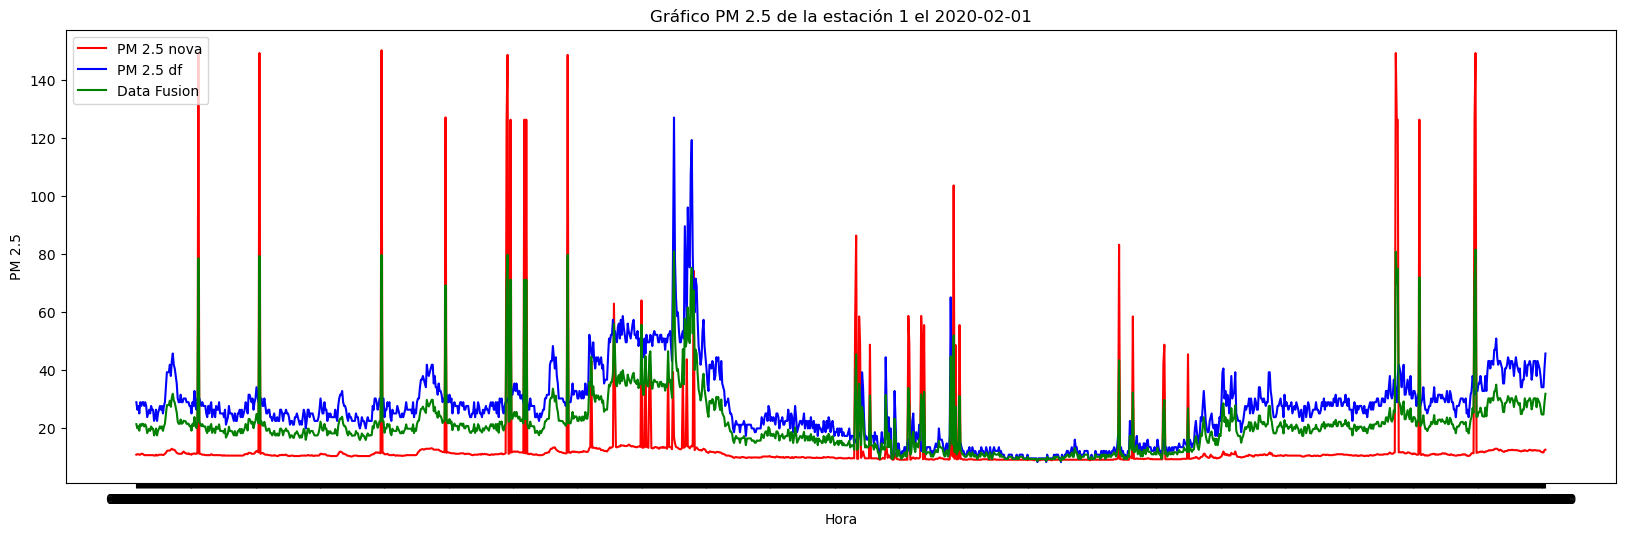

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def OLDF (xi,xj,medi,medj,vari,varj):
    # Optimal Linear Data Fusion (OLDF) technique
    # xi = observación del sensor i
    # xj = observación del sensor j
    # medi = Media del sensor i
    # medi = Media del sensor j
    # vari = Varianza del sensor i
    # varj = Varianza del sensor j
     
    a = langragian (vari,varj)[0]
    b = 1-a
    f1 = (a*xi) + (b*xj)
        
    varXij_1 = (a**2)*vari + (b**2)*varj
    
    f2 = ((varj*xi)+(vari*xj))/(vari + varj)
    
    varXij_2 = ((1/vari)+(1/varj))**(-1)
   
    return f1,f2

def langragian (vari,varj):
    # Halla el valor máximo de la varianza de xij
    # vari = Varianza del sensor i
    # varj = Varianza del sensor j
    
    a = varj/(vari + varj)
    b = vari/(vari + varj)
    
    return a,b

datos = pd.read_csv("F:\PhD\Datos SIATA\Análisis\Descriptivo\datosCoordenados_CS.csv",sep=",")

#DATOS DEL GRAFICO
fecha = "2020-02-01"
estacion = 1

#FILTRADO DE DATOS PARA EL GRAFICO
pm25 = datos.loc[:,["codigoSerial", "fecha", "hora", "pm25_df", "pm25_nova"]]
pm25 = pm25.loc[pm25.loc[:,"fecha"] == fecha]

nodos = pm25.groupby(['codigoSerial']).groups.keys()

estadisticos = pd.DataFrame(columns=['codigoSerial', 
                                     'media_df', 
                                     'mediana_df', 
                                     'desviacion_df', 
                                     'varianza_df', 
                                     'media_nova', 
                                     'mediana_nova', 
                                     'desviacion_nova', 
                                     'varianza_nova'] )
for i in nodos:
    pm25_1 = pm25.loc[pm25.loc[:,"codigoSerial"] == i]
    pm25_1.reset_index(inplace=True, drop=True)  # Reinicia índice del DataFrame
    estadisticos = estadisticos.append({'codigoSerial': i, 
                                        'media_df': round(np.mean(pm25_1["pm25_df"]),2), 
                                        'mediana_df': round(np.median(pm25_1["pm25_df"]),2), 
                                        'desviacion_df': round(np.std(pm25_1["pm25_df"]),2), 
                                        'varianza_df': round(np.var(pm25_1["pm25_df"]),2),
                                        'media_nova': round(np.mean(pm25_1["pm25_nova"]),2), 
                                        'mediana_nova': round(np.median(pm25_1["pm25_nova"]),2), 
                                        'desviacion_nova': round(np.std(pm25_1["pm25_nova"]),2), 
                                        'varianza_nova': round(np.var(pm25_1["pm25_nova"]),2)}, 
                                       ignore_index=True)



pm25_DF = pm25.loc[pm25.loc[:,"codigoSerial"] == estacion]
#pm25_DF["dataFusion"] = 0.0   # Se agrega columna dataFusion vacia al DataFrame existente
pm25_DF = pm25_DF.assign(dataFusion=0.0) # Se agrega columna dataFusion vacia al DataFrame existente
pm25_DF.reset_index(inplace=True, drop=True)  # Reinicia índice del DataFrame
est = estadisticos.loc[estadisticos.loc[:,"codigoSerial"] == estacion]
est.reset_index(inplace=True, drop=True)  # Reinicia índice del DataFrame

for i in range(len(pm25_DF)):
    fusion = OLDF(pm25_DF["pm25_df"][i],
                  pm25_DF["pm25_nova"][i],
                  est["media_df"][0],
                  est["media_nova"][0],
                  est["varianza_df"][0],
                  est["varianza_nova"][0])[1]
    
    pm25_DF["dataFusion"][i] = round(fusion,2)
    
    
#desviacion = est["media_df"][0]
#media = est["media_df"][0]
    
#GRAFICO
plt.figure(figsize=(20, 6), dpi=100)
plt.plot(pm25_DF["hora"],pm25_DF["pm25_nova"],color="red",label="PM 2.5 nova")
plt.plot(pm25_DF["hora"],pm25_DF["pm25_df"],color="blue",label="PM 2.5 df")
plt.plot(pm25_DF["hora"],pm25_DF["dataFusion"],color="green",label="Data Fusion")


# Etiquetas
plt.title("Gráfico PM 2.5 de la estación "+str(estacion)+" el "+fecha)
          #+" con media "+str(media)+" y desviación "+str(desviacion))
plt.xlabel("Hora")
#plt.xlabel(fecha)
plt.ylabel("PM 2.5")
plt.legend(loc='upper left')
plt.show()

In [6]:
estadisticos

,codigoSerial,media_df,mediana_df,desviacion_df,varianza_df,media_nova,mediana_nova,desviacion_nova,varianza_nova
0,1.0,26.75,26.28,12.55,157.40,12.96,10.60,14.79,218.74
1,2.0,31.14,29.99,14.81,219.24,26.88,28.05,12.73,162.16
2,4.0,28.46,28.38,9.58,91.72,14.32,10.33,20.83,433.91
3,5.0,40.54,38.65,13.87,192.33,14.53,10.52,19.03,361.96
4,9.0,33.18,34.97,14.95,223.58,47.55,47.13,25.27,638.41
...,...,...,...,...,...,...,...,...,...
142,245.0,33.42,34.31,17.01,289.21,27.39,27.49,14.07,197.94
143,246.0,26.42,26.83,5.83,33.93,23.86,23.04,10.08,101.53
144,247.0,27.36,31.04,13.53,183.04,22.97,24.07,13.26,175.91
145,248.0,29.31,31.77,10.46,109.48,27.22,23.25,22.17,491.63


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


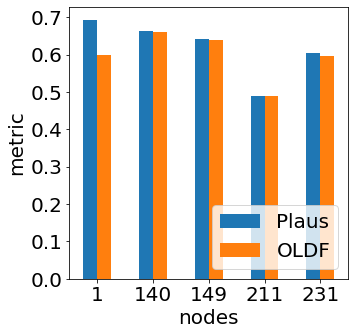

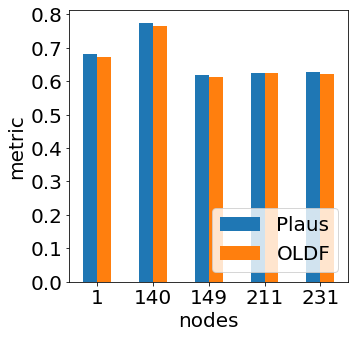

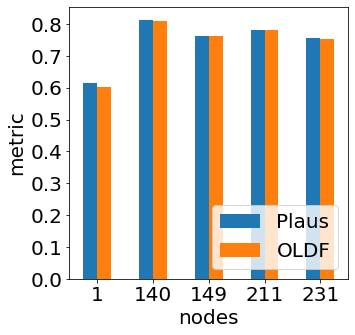

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

presicion = pd.DataFrame(data=[[0.693,0.599],[0.664,0.661],[0.643,0.640],[0.490,0.490],[0.604,0.596]],
                         columns=['Plaus','OLDF'], index=[1,140,149,211,231])

accuracy = pd.DataFrame(data=[[0.681,0.671],[0.774,0.766],[0.617,0.613],[0.625,0.623],[0.628,0.622]],
                         columns=['Plaus','OLDF'], index=[1,140,149,211,231])

DQIndex = pd.DataFrame(data=[[0.614,0.602],[0.813,0.809],[0.764,0.762],[0.782,0.782],[0.757, 0.754]],
                         columns=['Plaus','OLDF'], index=[1,140,149,211,231])


ax = presicion.plot(kind='bar', figsize=(5,5), fontsize=20, rot=0, xlabel='nodes', ylabel='metric')
ax.set_xlabel('nodes', fontsize=20)
ax.set_ylabel('metric', fontsize=20)
ax.legend(fontsize=20, loc="lower right")
ax.get_figure().savefig('presi_fusion.eps')

ax1 = accuracy.plot.bar(figsize=(5,5), rot=0, fontsize=20, xlabel='nodes', ylabel='metric')
ax1.set_xlabel('nodes', fontsize=20)
ax1.set_ylabel('metric', fontsize=20)
ax1.legend(fontsize=20, loc="lower right")
ax1.get_figure().savefig('accu_fusion.eps')

ax2 = DQIndex.plot.bar(figsize=(5,5), rot=0, fontsize=20, xlabel='nodes', ylabel='metric')
ax2.set_xlabel('nodes', fontsize=20)
ax2.set_ylabel('metric', fontsize=20)
ax2.legend(fontsize=20, loc="lower right")
ax2.get_figure().savefig('dqi_fusion.eps')

